In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import math

df = pd.read_csv("../data/train_valid_all.csv")

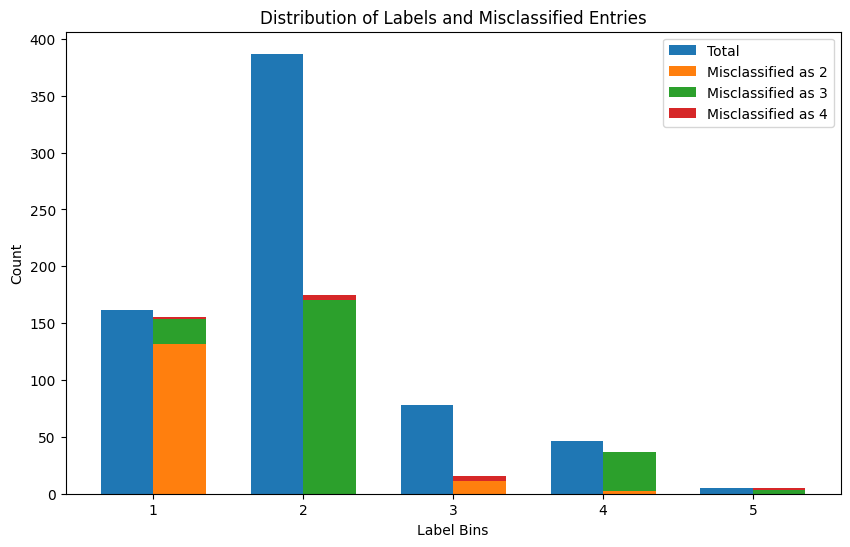

In [5]:
# Assuming 'Prediction' column exists in the dataframe

# Create a new column to identify misclassified entries
df['Misclassified'] = df['Label'] != df['Prediction']

# Create bins for the 'Label' values
bins = [0, 1, 2, 3, 4, 5]
labels = ['1', '2', '3', '4', '5']
df['Label_Binned'] = pd.cut(df['Label'], bins=bins, labels=labels, include_lowest=True)

# Group by the bins and count the number of entries and misclassified entries
grouped = df.groupby('Label_Binned').agg({'Label': 'count'}).reset_index()
grouped.columns = ['Label_Binned', 'Total']

# Create a pivot table to count misclassified predictions for each label bin
misclassified_pivot = df[df['Misclassified']].pivot_table(index='Label_Binned', columns='Prediction', aggfunc='size', fill_value=0)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(grouped))

# Plot total counts
bar1 = ax.bar(index, grouped['Total'], bar_width, label='Total')

# Plot misclassified counts as stacked bars
bottom = np.zeros(len(grouped))
for col in misclassified_pivot.columns:
    bar = ax.bar(index + bar_width, misclassified_pivot[col], bar_width, bottom=bottom, label=f'Misclassified as {col}')
    bottom += misclassified_pivot[col]

ax.set_xlabel('Label Bins')
ax.set_ylabel('Count')
ax.set_title('Distribution of Labels and Misclassified Entries')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(grouped['Label_Binned'])
ax.legend()

plt.show()


In [17]:
from langchain import PromptTemplate, LLMChain
from langchain.llms import OpenAI
from langchain.prompts.few_shot import FewShotPromptTemplate
from langchain.prompts.prompt import PromptTemplate

# Initialize the language model
llm = OpenAI(temperature=0.9)

sentiment_examples = [
    {"input": "so yeah, the evaluation part that I already told that we don't have right now and we really honestly don't have that in mind, but for the system requirements, I think the system is the systems are really are good. We have GPS we are we have a good number of CPUs and we have a good number of GPS to so for the system requirement. That won't be any issue. We have databases and also yeah 30 for this and it doesn't seem to have any show.", "output": "Lowest"},
    {"input": "Hike in machine learning I know about the regularization technique like Labs on Rigid, but I am not sure about in generative way.", "output": "Lowest"},
    {"input": "And actually I was I was in a contributing in the restful API integration and R&D services not in the day of sparked. It has been doing by the other team which is offshore team. So but on a high level I have an understanding of how we carry out their practices and to see a CD pipelines. We we can manage our you know development and deployment.", "output": "Lowest"},
    {"input": "Here so basically use a python Library known as media pipe, which is used in opencv. So what it does it detects some hand marks on your on your palm. So basically there are 21 hand marks. So if I will show you so the basically there are 21 hand marks on top starting from 0 to 21. So according to this the landmarks, we have created with functional dependency program, which will does this will be working on 2D coordinate system. So according to the coordinate system the all the letters of the English alphabet has been defined on the palm and if we do some proper signature there I have been working on American Sign Language. So that different sign language is for different letters. So we have input each of the letter and each of the coordinate for a specific letter and according to that in the Dynamically in live capture feed we are recognizing the letters as well as for more of the input process variable. So convert to take it to the next step and we have also tried to build a word former and according to that. We are facing screen on Life field and showing the letters and we can form the word.", "output": "Higher"},
    {"input": "Thank you, very good. So my second experiment involved something called Mirror Vic. So that was a fine tuning technique, which is closely related to language modeling which forces the model to identify deeper meanings of words. Okay. So what we do is we you know, We actually Target a single word in a sentence to learn the deeper, meaning of then mask some random other words in the same sentence and then, you know try to get a word in context representation of the word or a word in context embedding of the word. So the embedding of the word but in that context, right so this concept I extended it to idioms. So I I replace idioms with a single, you know new token that I personally created. So because that's a research that shows that idioms are treated independently other than you know pieces, you know, idioms are handled as independent tokens rather than you know, aggregate of other words, right? That is how Transformers usually try to learn ads and that is how humans actually understand. And idioms also, so I first introduced a single token in place of the idiom and then try to learn the meaning of it through this mirror week technique. So in the where we technique what we did was I masked the idiom token. Okay, so I masked the idiom token. And then tried to learn the meaning of it through context. Okay, so if the idiom is used in if the idiomatic phase potentially idiomatic phrase is used in a non-literal sense, then the embedding of it would be very different than when the idiom is used in a literal sense. Right? So we find it for language modeling using contrastive learning described in the middle and we found that it really really helps in. Let's say magnifying the performance of bird or you know, extending or increase in the performance of bird towards understanding idioms. So that was a very interesting. Mind and it really did you know. Help increase the recognition of idioms in Transformer models. So first experiment was to understand how not Transformers actually treat idioms as a part of a task or as part of language then the second experiment was to try to improve the performance of the model towards understanding idioms. That concludes my project. And thank you.", "output": "Higher"},
    {"input": "Yes, so attention mechanism is a machine learning based mechanism that mimics cognitive attention. So this allows machine learning models to focus on specific parts of the input data. With varying levels of importance given to different elements in the sequence.", "output": "Higher"}
]

sentiment_example_template = """
Text: {input}
Quality: {output}
"""

sentiment_example_prompt = PromptTemplate(
    input_variables=["input", "output"],
    template=sentiment_example_template
)

# Quality in this case depends on both the accuracy and clarity of the technical solution described as well as how appropriate it is for the use case. 

sentiment_few_shot_prompt = FewShotPromptTemplate(
    examples=sentiment_examples,
    example_prompt=sentiment_example_prompt,
    prefix="Classify the quality of the following texts as Lowest or Higher:",
    suffix="Text: {input}\n Quality:",
    input_variables=["input"],
    example_separator="\n\n"
)

sentiment_chain = sentiment_few_shot_prompt | llm 

sentiment_texts = [
    "In web scraping, I have faced multiple challenges. I will describe each one in detail earlier first. We are used to scrape any very few sites like not to sites and scraping them is they are just static Pages like basic HTML if you load the website, you'll get the HTML you can just scrape it from there. But with the with the number of parties that are growing with the chatbot and the company we need to scrape multiple websites and each website comes in different formats. So I'm asked static websites some come as an infinite scroll upside and some commas like toggle ones like you have to use some feature like sidebar or something to scroll between the news articles. So yeah, what have done at this time was I used to study how these website is frame. Like what is the essential HTML structure that is followed and how is the class structure given to each component in the website and if there is any common class, how can you differentiate? Particular content I want from other ones which share this common class like using other properties or Keys available in the HTML tag and some kind of that. I had landed through debugging the site and doing some test runs and in finance clothing have done that with the puppeteer. Failure. We used access for simple scripting which doesn't work. Then we shifted to Puppeteer and when we shifted to Puppeteer when we automated this whole scraping and cleaning and everything process, we Face difficulties because of multi-threading what happened what used to happen was there used to be the scraper used to work on some websites. And if any website is loading slow, it used to exit after 30 seconds and it will not address it again. So then I resist about what are the other ways we can do then I got to know about Puppeteer clusters, which is essentially you open fights in a chrome instance and do balance scraping which increases the speed of scraping and also that also has a feature of sending back to the cube suppose if any site is a or any subside in a website, which we are supposed to scrape. He's a not loading fast. It could be due to network reason or it could be due to the server problem at the website holder itself What we have done was if any exception has happened during the scraping. We used to recent back into the cluster. So this class thank you maintains a list of URLs. It needs to scrape and when something is filled it is added back to the scraping happens until this all these URLs are scraped safely and embedded into the database and that is one difficult. I saw the property clusters and a we used to scrape only static sites, and then I converted into scrolling sites and INF. school websites, these are all I just done with Puppeteer and various extensions it has", # L4 P3
    "Okay. So all of the information that is stored all of the user information specifically is stored in an encrypted database. The encryption is done using the asset 64 method, which is inbuilt in Django. The SS 64 takes up a lot of space but that's why we use AWS services to host our services. Yes apart from that. No other features has been used but the payment details are flushed out every 10 minutes. So as to not keep any record of the user's details", # L1 P4
    "Okay. So basically what we are doing is we are hosting our own mlflow Service mlflow as a service. So in mlflow what we do is we try to log artifacts for each of our run and it will be stored in our backend. So whenever we want we'll just load that particular artifact whenever you want to replicate so it's like just logged in some database kind of", # L2 P3
]

for text in sentiment_texts:
    sentiment = sentiment_chain.invoke(text)
    print(f"Text: {text}")
    print(f"Quality: {sentiment.strip()}\n")

Text: In web scraping, I have faced multiple challenges. I will describe each one in detail earlier first. We are used to scrape any very few sites like not to sites and scraping them is they are just static Pages like basic HTML if you load the website, you'll get the HTML you can just scrape it from there. But with the with the number of parties that are growing with the chatbot and the company we need to scrape multiple websites and each website comes in different formats. So I'm asked static websites some come as an infinite scroll upside and some commas like toggle ones like you have to use some feature like sidebar or something to scroll between the news articles. So yeah, what have done at this time was I used to study how these website is frame. Like what is the essential HTML structure that is followed and how is the class structure given to each component in the website and if there is any common class, how can you differentiate? Particular content I want from other ones whic

In [16]:
df = pd.read_csv("../data/train_valid_all.csv")
misclassified_df = df[df["Label"] != df["Prediction"]]
misclassified_df = misclassified_df[["Question", "Response", "Label",  "Prediction"]]
misclassified_df.to_csv("../data/train_valid_misclassified.csv", index=False)
